In [1]:
print("Hello")

Hello


In [4]:
import os
print(os.listdir())  # Lists files in the current directory

['.config', 'income_by_state_2023.csv.csv', 'sample_data']


In [20]:
import pandas as pd
df = pd.read_csv('/content/income_by_state_2023.csv.csv',skiprows = 1)  # No extra path needed if it’s there
df = df[['Geographic Area Name', 'Estimate!!Households!!Median income (dollars)']]  # Filter to state and median income
df = df.rename(columns={'Geographic Area Name': 'State', 'Estimate!!Households!!Median income (dollars)': 'Median_Income'})  # Rename for simplicity
df['Median_Income'] = df['Median_Income'].replace('[\$,]', '', regex=True).astype(float)  # Convert to numeric
df.dropna(inplace=True)  # Drop nulls
print(df.head())  # Check first 5 rows
print(df.describe())  # Check stats

        State  Median_Income
0     Alabama        62212.0
1      Alaska        86631.0
2     Arizona        77315.0
3    Arkansas        58700.0
4  California        95521.0
       Median_Income
count      52.000000
mean    76589.519231
std     14668.122172
min     25621.000000
25%     69023.500000
50%     74631.500000
75%     85472.250000
max    108210.000000


In [22]:
avg_income = df['Median_Income'].mean()
top_5 = df.nlargest(5, 'Median_Income')
bottom_5 = df.nsmallest(5, 'Median_Income')
print(f"Average Median Income: ${avg_income:,.2f}")
print("Top 5 States:")
print(top_5[['State', 'Median_Income']])
print("Bottom 5 States:")
print(bottom_5[['State', 'Median_Income']])  # Bottom 5

Average Median Income: $76,589.52
Top 5 States:
                   State  Median_Income
8   District of Columbia       108210.0
21         Massachusetts        99858.0
30            New Jersey        99781.0
20              Maryland        98678.0
29         New Hampshire        96838.0
Bottom 5 States:
            State  Median_Income
51    Puerto Rico        25621.0
24    Mississippi        54203.0
48  West Virginia        55948.0
18      Louisiana        58229.0
3        Arkansas        58700.0


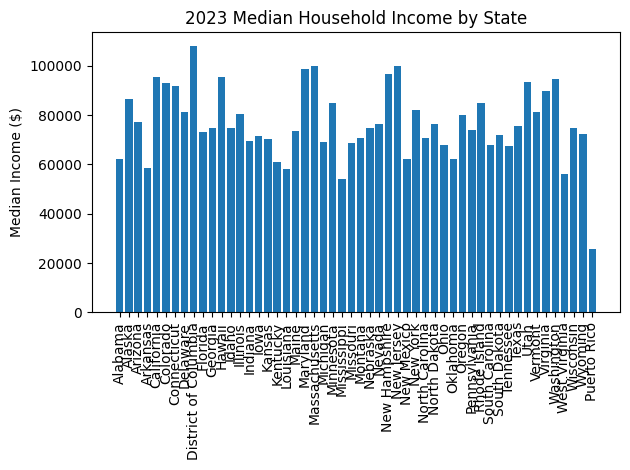

In [23]:
import matplotlib.pyplot as plt
plt.bar(df['State'], df['Median_Income'])
plt.xticks(rotation=90)
plt.ylabel('Median Income ($)')
plt.title('2023 Median Household Income by State')
plt.tight_layout()
plt.show()

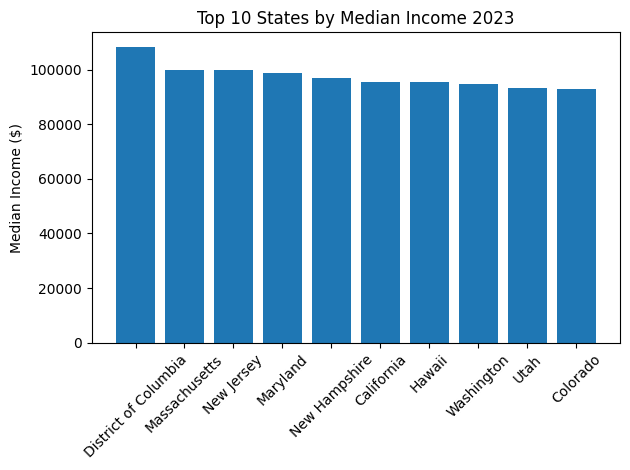

In [26]:
top_10 = df.nlargest(10, 'Median_Income')
plt.bar(top_10['State'], top_10['Median_Income'])
plt.xticks(rotation=45)
plt.ylabel('Median Income ($)')
plt.title('Top 10 States by Median Income 2023')
plt.tight_layout()
plt.savefig('income_by_state.png')
plt.show()